In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)
from Class.jenie import Jenie
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from umap import UMAP
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ParameterGrid

In [ ]:
plt.style.use('dark_background')

In [4]:
adata_ref = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\gellyfish_scdata.h5ad")
adata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Xenium_mouse_filtered.h5ad")
adata.X = adata.X.toarray()
shared = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:,shared]
adata = adata[:, shared]
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.tl.ingest(adata, adata_ref, obs="MERFISH celltype")

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\krist\AppData\Local\Programs\Pytho

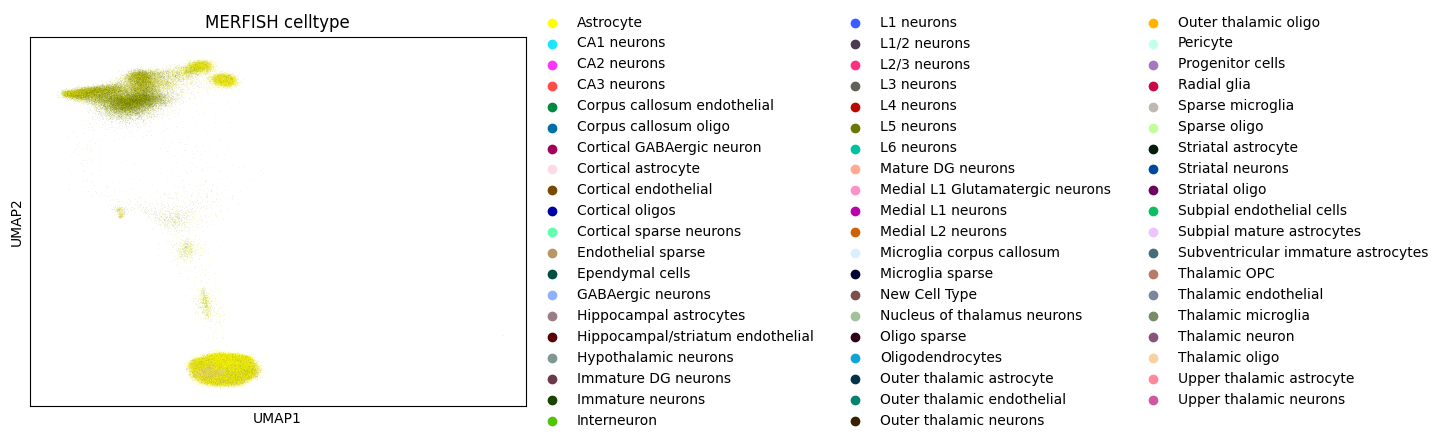

In [10]:
sc.pl.umap(adata, color = 'MERFISH celltype')

In [9]:
adata.obs['MERFISH celltype'].value_counts()

Astrocyte                             392613
L5 neurons                             74157
Subpial mature astrocytes              56324
Hippocampal astrocytes                 10843
Cortical astrocyte                      4878
Corpus callosum oligo                   3649
Ependymal cells                         3221
GABAergic neurons                        875
L3 neurons                               374
Endothelial sparse                       130
Outer thalamic neurons                    70
Subventricular immature astrocytes         2
Medial L1 neurons                          2
Cortical oligos                            1
Cortical sparse neurons                    0
Striatal neurons                           0
Outer thalamic endothelial                 0
Corpus callosum endothelial                0
Outer thalamic oligo                       0
Pericyte                                   0
Progenitor cells                           0
Radial glia                                0
Sparse mic